In [45]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


In [46]:
import fates_xarray_funcs
from fates_xarray_funcs import monthly_to_annual

In [3]:
cases = {'AD':'f19_0005_adspinup_const1700LUH_swdif_2pftspasturerangeland_39e91e09b5_7b982905',
         'postAD':'f19_0006_postadspinup_const1700LUH_39e91e09b5_7b982905'}

In [4]:
fins_annual = {}
for i, label in enumerate(cases):
    case = cases[label]
    fins_annual.update({label:xr.open_dataset('/global/homes/c/cdkoven/scratch/e3sm_scratch/pm-cpu/'+case+'/run/'+case+'.annual.sofar.nc')})
    fins_annual[label]['time'] = np.arange(len(fins_annual[label]['time']))

In [5]:
fins_monthly = {}
for i, label in enumerate(cases):
    case = cases[label]
    fins_monthly.update({label:xr.open_dataset('/global/homes/c/cdkoven/scratch/e3sm_scratch/pm-cpu/'+case+'/run/'+case+'.monthly.sofar.nc')})
    fins_monthly[label]['time'] = np.arange(len(fins_monthly[label]['time']))/12.
                                       

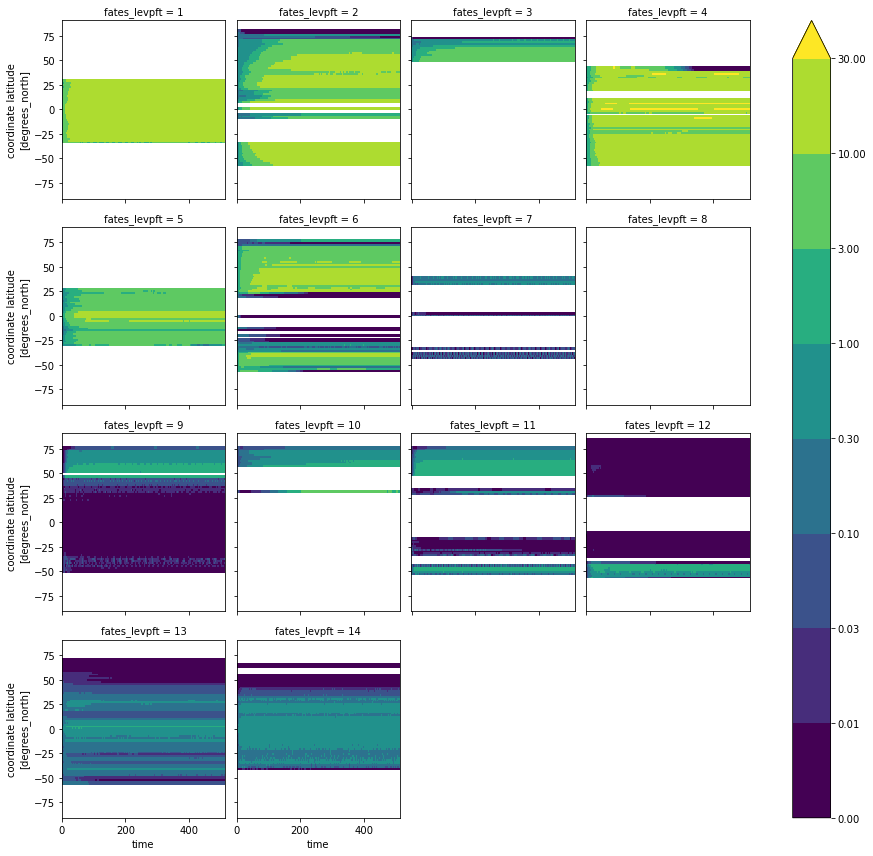

In [6]:
(fins_annual['AD']['FATES_VEGC_PF'].mean(dim='lon') / fins_annual['AD']['FATES_NOCOMP_PATCHAREA_PF'].mean(dim='lon')).plot(levels=[0.,0.01,0.03,0.1,0.3,1,3,10,30],x='time',y='lat',col='fates_levpft',col_wrap=4)


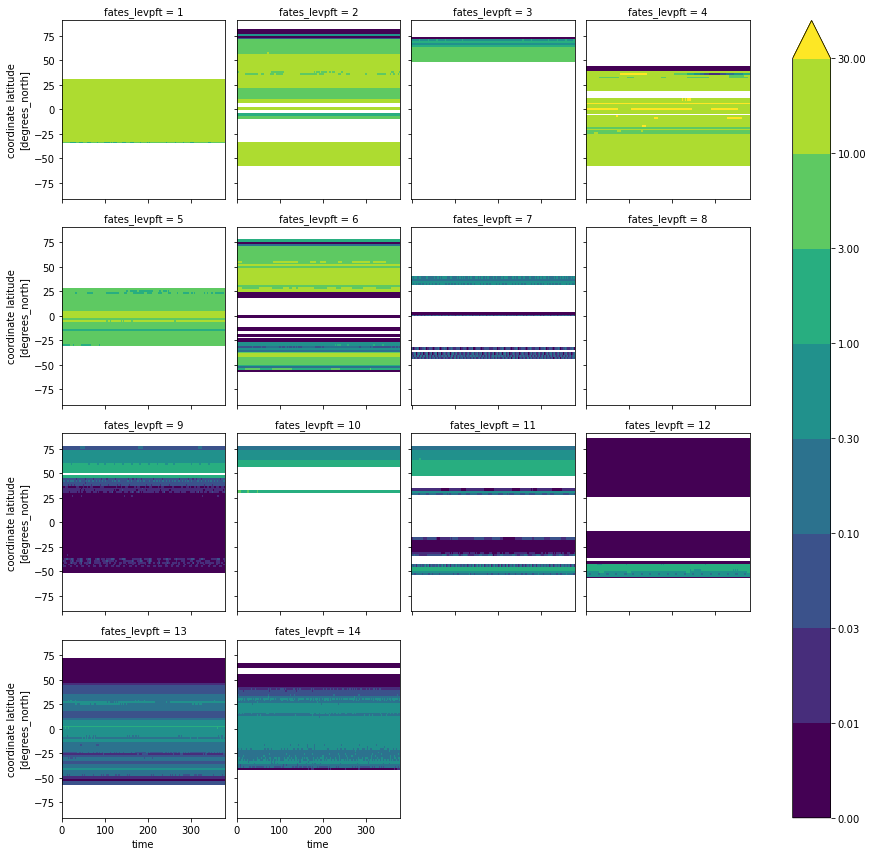

In [7]:
(fins_annual['postAD']['FATES_VEGC_PF'].mean(dim='lon') / fins_annual['postAD']['FATES_NOCOMP_PATCHAREA_PF'].mean(dim='lon')).plot(levels=[0.,0.01,0.03,0.1,0.3,1,3,10,30],x='time',y='lat',col='fates_levpft',col_wrap=4)


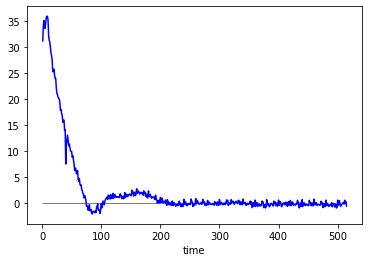

In [8]:
fates_xarray_funcs.monthly_to_annual((fins_monthly['AD']['NBP']) * 86400 * 365 * 1e-15 * fins_annual['AD']['area'] * 1e6).sum(dim=('lat','lon')).plot(color='Blue', linestyle='solid')

plt.hlines(0, 0, 250, color='black', linewidth=0.5)

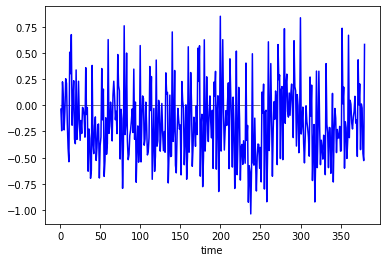

In [9]:
fates_xarray_funcs.monthly_to_annual((fins_monthly['postAD']['NBP']) * 86400 * 365 * 1e-15 * fins_annual['postAD']['area'] * 1e6).sum(dim=('lat','lon')).plot(color='Blue', linestyle='solid')

plt.hlines(0, 0, 250, color='black', linewidth=0.5)

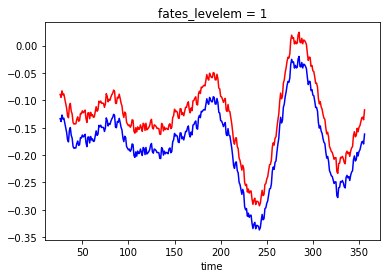

In [10]:
nbp_global = fates_xarray_funcs.monthly_to_annual(fins_monthly['postAD']['NBP'] * 86400 * 365 * 1e-15 * fins_annual['postAD']['area'] * 1e6).sum(dim=('lat','lon'))
nbp_global.rolling(time=50, center=True).mean().plot(color='Blue', linestyle='solid')

nbp_plusseedrain_global = (fates_xarray_funcs.monthly_to_annual((fins_monthly['postAD']['NBP'] + fins_monthly['postAD']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0)*1e3))* 86400 * 365 * 1e-15 * fins_annual['postAD']['area'] * 1e6).sum(dim=('lat','lon'))
nbp_plusseedrain_global.rolling(time=50, center=True).mean().plot(color='Red', linestyle='solid')

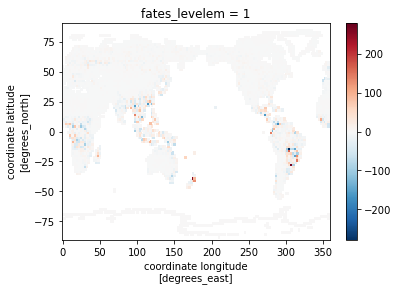

In [11]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['postAD']['NBP'] + fins_monthly['postAD']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0)*1e3))* 86400 * 365 ).isel(time=slice(-50,None)).mean(dim='time').plot()


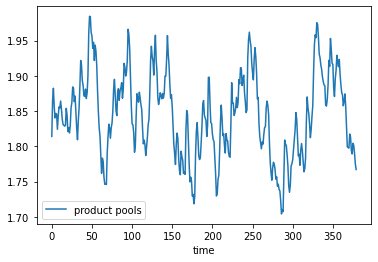

In [12]:
elm_productc_global = ((fins_annual['postAD']['PROD10C']+fins_annual['postAD']['PROD100C'])* fins_annual['postAD']['area'] * 1e6/1e15).sum(dim=('lat','lon'))
elm_productc_global.plot(label='product pools')
plt.legend()

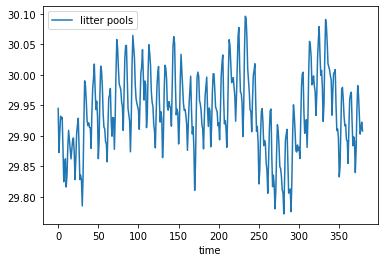

In [13]:
elm_litterc_global = ((fins_annual['postAD']['LITTERC'])* fins_annual['postAD']['area'] * 1e6/1e15).sum(dim=('lat','lon'))
elm_litterc_global.plot(label='litter pools')
plt.legend()

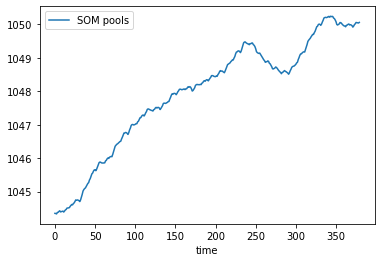

In [14]:
totsomc_global = ((fins_annual['postAD']['TOTSOMC'])* fins_annual['postAD']['area'] * 1e6/1e15).sum(dim=('lat','lon'))
totsomc_global.plot(label='SOM pools')
plt.legend()

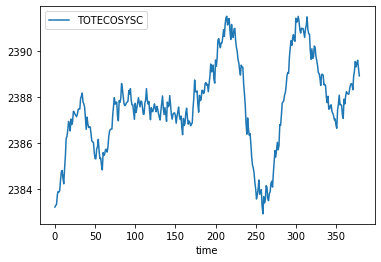

In [15]:
totecosysc_global = ((fins_annual['postAD']['TOTECOSYSC'])* fins_annual['postAD']['area'] * 1e6/1e15).sum(dim=('lat','lon'))
totecosysc_global.plot(label='TOTECOSYSC')
plt.legend()

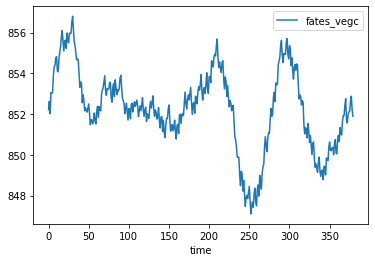

In [16]:
fates_vegc_global = ((fins_annual['postAD']['FATES_VEGC'])* fins_annual['postAD']['area'] *fins_annual['postAD']['FATES_FRACTION'] * 1e3*1e6/1e15).sum(dim=('lat','lon'))
fates_vegc_global.plot(label='fates_vegc')
plt.legend()

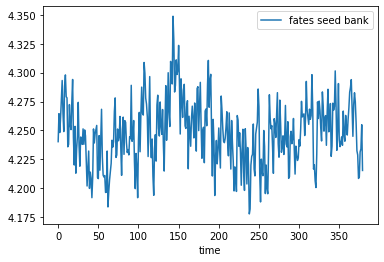

In [17]:
fates_seeds_global = ((fins_annual['postAD']['FATES_SEED_BANK'])* fins_annual['postAD']['area'] *fins_annual['postAD']['FATES_FRACTION'] * 1e3*1e6/1e15).sum(dim=('lat','lon'))
fates_seeds_global.plot(label='fates seed bank')
plt.legend()

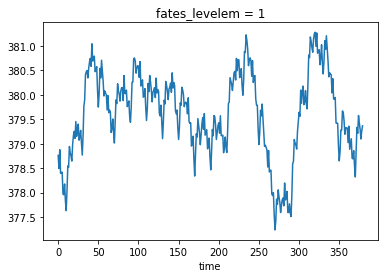

In [18]:
fates_cwd = (fins_annual['postAD']['FATES_LITTER_AG_CWD_EL'] + fins_annual['postAD']['FATES_LITTER_BG_CWD_EL']).isel(fates_levelem=0)
cwdc_global = (fates_cwd * fins_annual['postAD']['FATES_FRACTION'] * fins_annual['postAD']['area'] * 1e6 * 1e3/1e15).sum(dim=('lat','lon'))
(cwdc_global).plot(label='fates cwdc')

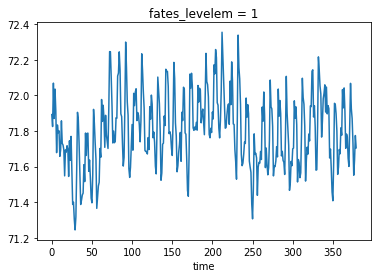

In [19]:
fates_finelitter = (fins_annual['postAD']['FATES_LITTER_AG_FINE_EL'] + fins_annual['postAD']['FATES_LITTER_BG_FINE_EL']).isel(fates_levelem=0)
fates_finelitter_global = (fates_finelitter * fins_annual['postAD']['FATES_FRACTION'] * fins_annual['postAD']['area'] * 1e6 * 1e3/1e15).sum(dim=('lat','lon'))
(fates_finelitter_global).plot(label='fates fine litter')

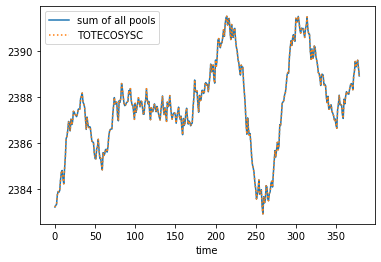

In [20]:
(cwdc_global + fates_finelitter_global + fates_seeds_global + fates_vegc_global + totsomc_global + elm_litterc_global + elm_productc_global).plot(label = 'sum of all pools')
totecosysc_global.plot(label='TOTECOSYSC', linestyle=':')
plt.legend()

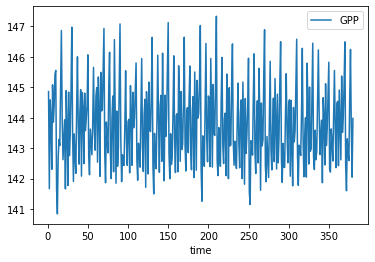

In [21]:
fates_gpp_global = (monthly_to_annual(fins_monthly['postAD']['FATES_GPP']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * fins_annual['postAD']['area'] * 86400. * 365.* 1e6 * 1e3/1e15).sum(dim=('lat','lon'))
fates_gpp_global.plot(label = 'GPP')
plt.legend()

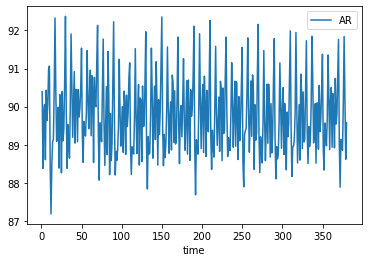

In [22]:
fates_ar_global = (monthly_to_annual(fins_monthly['postAD']['FATES_AUTORESP']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * fins_annual['postAD']['area'] * 86400. * 365.* 1e6 * 1e3/1e15).sum(dim=('lat','lon'))
fates_ar_global.plot(label = 'AR')
plt.legend()

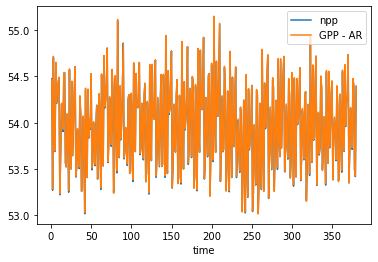

In [23]:
fates_npp_global = (monthly_to_annual(fins_monthly['postAD']['FATES_NPP']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * fins_annual['postAD']['area'] * 86400. * 365.* 1e6 * 1e3/1e15).sum(dim=('lat','lon'))
fates_npp_global.plot(label = 'npp')

(fates_gpp_global - fates_ar_global).plot(label = 'GPP - AR')

plt.legend()

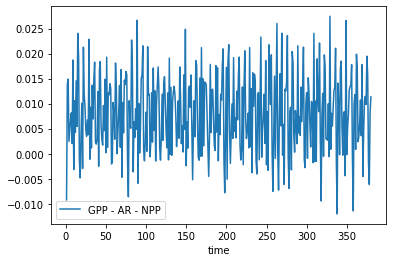

In [24]:
(fates_gpp_global - fates_ar_global - fates_npp_global).plot(label = 'GPP - AR - NPP')
plt.legend()

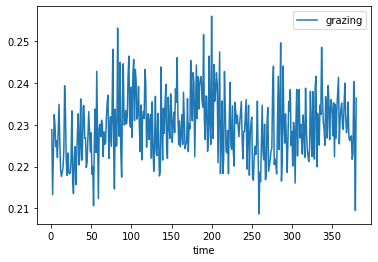

In [25]:
fates_grazing_global = (monthly_to_annual(fins_monthly['postAD']['FATES_GRAZING']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * fins_annual['postAD']['area'] * 86400. * 365.* 1e6 * 1e3/1e15).sum(dim=('lat','lon'))
fates_grazing_global.plot(label = 'grazing')
plt.legend()

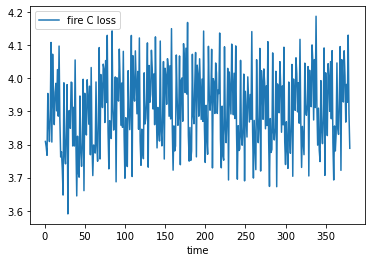

In [26]:
fates_fire_closs_global = (monthly_to_annual(fins_monthly['postAD']['FATES_FIRE_CLOSS']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * fins_annual['postAD']['area'] * 86400. * 365.* 1e6 * 1e3/1e15).sum(dim=('lat','lon'))
fates_fire_closs_global.plot(label = 'fire C loss')
plt.legend()

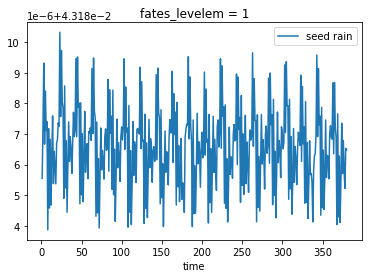

In [27]:
seed_rain_global = (monthly_to_annual(fins_monthly['postAD']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0)) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * fins_annual['postAD']['area'] * 86400. * 365.* 1e6 * 1e3/1e15).sum(dim=('lat','lon'))
seed_rain_global.plot(label = 'seed rain')
plt.legend()

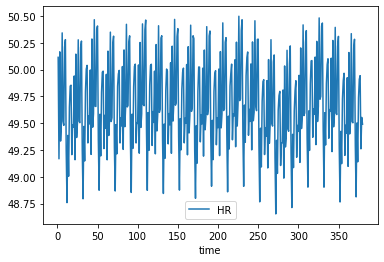

In [28]:
hr_global = (monthly_to_annual(fins_monthly['postAD']['HR'])  * fins_annual['postAD']['area'] * 86400. * 365.* 1e6 /1e15).sum(dim=('lat','lon'))
hr_global.plot(label = 'HR')
plt.legend()

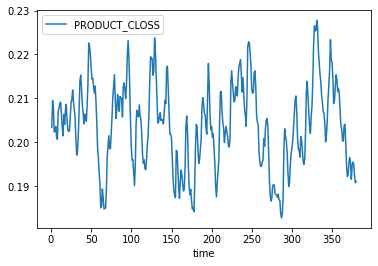

In [29]:
product_closs_global = (monthly_to_annual(fins_monthly['postAD']['PRODUCT_CLOSS'])  * fins_annual['postAD']['area'] * 86400. * 365.* 1e6 /1e15).sum(dim=('lat','lon'))
product_closs_global.plot(label = 'PRODUCT_CLOSS')
plt.legend()

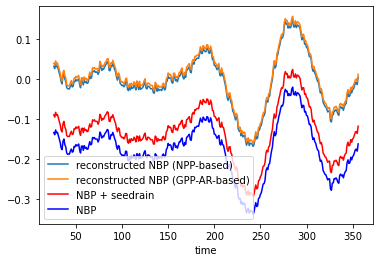

In [30]:
(fates_npp_global + seed_rain_global - hr_global - product_closs_global - fates_fire_closs_global - fates_grazing_global).rolling(time=50, center=True).mean().plot(label='reconstructed NBP (NPP-based)')
(fates_gpp_global - fates_ar_global + seed_rain_global - hr_global - product_closs_global - fates_fire_closs_global - fates_grazing_global).rolling(time=50, center=True).mean().plot(label='reconstructed NBP (GPP-AR-based)')

nbp_plusseedrain_global.rolling(time=50, center=True).mean().plot(color='Red', linestyle='solid', label='NBP + seedrain')
nbp_global.rolling(time=50, center=True).mean().plot(color='Blue', linestyle='solid', label='NBP')

plt.legend()

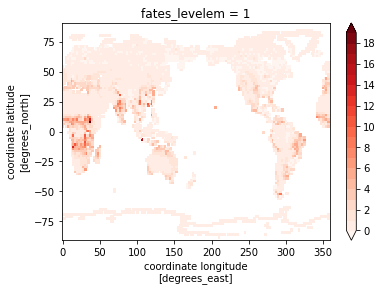

In [31]:
fates_gpp = (monthly_to_annual(fins_monthly['postAD']['FATES_GPP']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * 86400. * 365. * 1e3)
fates_npp = (monthly_to_annual(fins_monthly['postAD']['FATES_NPP']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * 86400. * 365. * 1e3)
fates_ar = (monthly_to_annual(fins_monthly['postAD']['FATES_AUTORESP']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * 86400. * 365. * 1e3)
fates_firecloss = (monthly_to_annual(fins_monthly['postAD']['FATES_FIRE_CLOSS']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * 86400. * 365. * 1e3)
fates_seedrain = (monthly_to_annual(fins_monthly['postAD']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0)) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * 86400. * 365. * 1e3)
fates_grazing = (monthly_to_annual(fins_monthly['postAD']['FATES_GRAZING']) * fins_annual['postAD']['FATES_FRACTION'].isel(time=0) * 86400. * 365. * 1e3)
elm_hr = (monthly_to_annual(fins_monthly['postAD']['HR']) * 86400. * 365.)
elm_productcloss = (monthly_to_annual(fins_monthly['postAD']['PRODUCT_CLOSS']) * 86400. * 365.)
elm_nbp = (monthly_to_annual(fins_monthly['postAD']['NBP']) * 86400. * 365.)

#(fates_npp - (fates_gpp - fates_ar)).isel(time=slice(-50,None)).mean(dim='time').plot()

((fates_gpp - fates_ar + fates_seedrain - fates_firecloss - fates_grazing - elm_hr - elm_productcloss) - elm_nbp).isel(time=slice(-50,None)).mean(dim='time').plot(levels=np.arange(20), cmap='Reds')

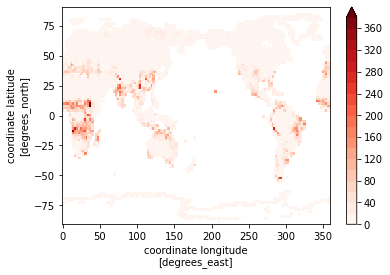

In [32]:
fates_firecloss.isel(time=slice(-50,None)).mean(dim='time').plot(levels=np.arange(20)*20, cmap='Reds')

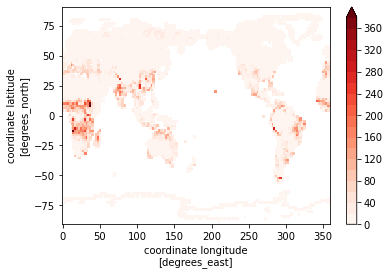

In [33]:
(fates_grazing + fates_firecloss).isel(time=slice(-50,None)).mean(dim='time').plot(levels=np.arange(20)*20, cmap='Reds')

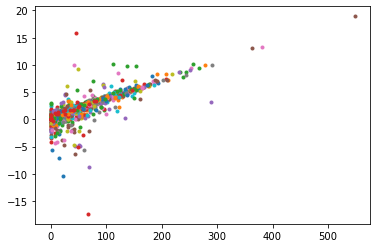

In [44]:
plt.plot((fates_grazing + fates_firecloss).isel(time=slice(-50,None)).mean(dim='time'), ((fates_npp + fates_seedrain - fates_firecloss - fates_grazing - elm_hr - elm_productcloss) - elm_nbp).isel(time=slice(-50,None)).mean(dim='time'), '.')


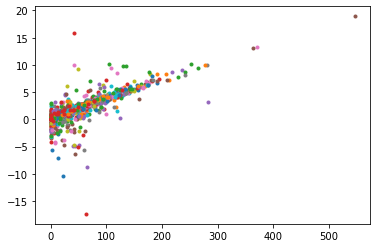

In [43]:
plt.plot((fates_firecloss).isel(time=slice(-50,None)).mean(dim='time'), ((fates_npp + fates_seedrain - fates_firecloss - fates_grazing - elm_hr - elm_productcloss) - elm_nbp).isel(time=slice(-50,None)).mean(dim='time'), '.')


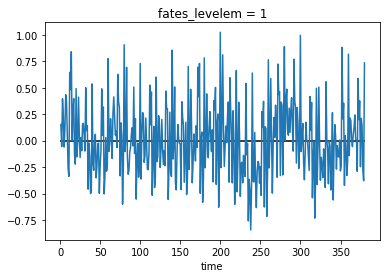

In [42]:
(fates_gpp_global - fates_ar_global + seed_rain_global - hr_global - product_closs_global - fates_fire_closs_global - fates_grazing_global).plot(label='reconstructed NBP (GPP-AR-based)')
plt.hlines((0.), xmin=0, xmax=380, color='Black')

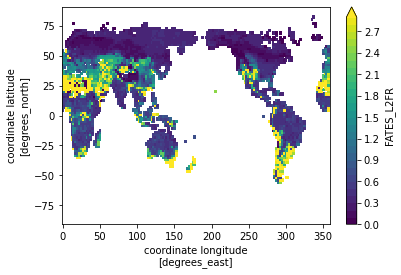

In [52]:
fins_annual['postAD']['FATES_L2FR'].isel(time=slice(-50,None)).mean(dim='time').plot(levels=np.arange(30)/10.)